# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

Although the area plot perserves the first plot's data, the second plot's visuals are not as clear. The y-axis, which represented percents previously, is now showing values over 100% for the second plot since it considers 0 to be where the first plot is. This makes it difficult to visualize the percentages of the second plot. One improvement would be to add labels to each individual point on each line. 

In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

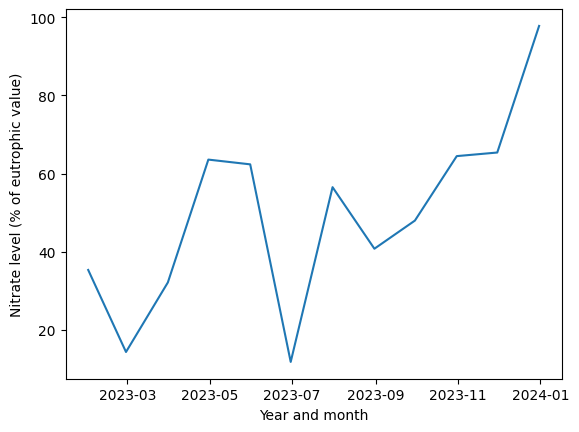

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

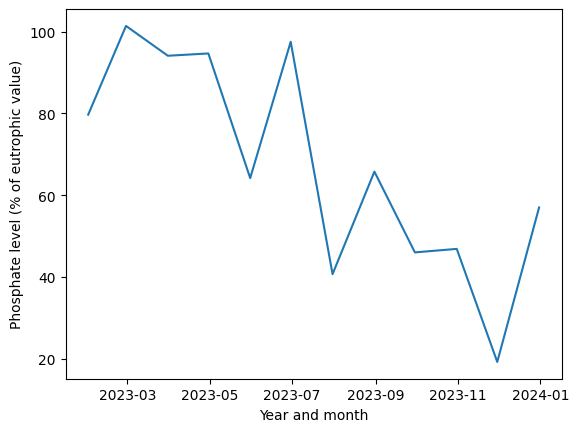

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

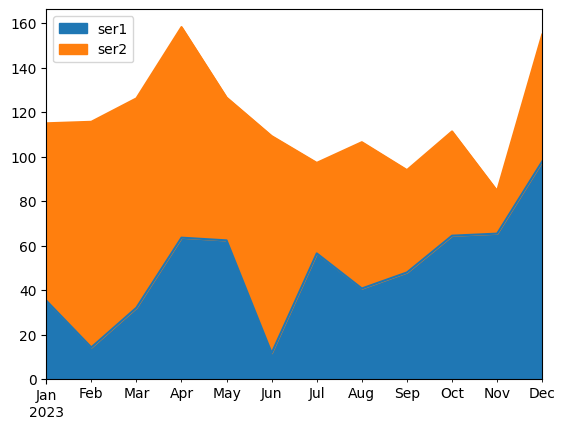

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

## Read Data

In [10]:
# https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml
li_small_accounts_df = pd.read_csv('C:/Users/caleb/Downloads/ibm_aml/LI-Small_accounts.csv')
li_small_accounts_df

,Bank Name,Bank ID,Account Number,Entity ID,Entity Name
0,China Bank #2820,314693,81B86A280,800D8CCF0,Corporation #41344
1,France Bank #4585,311253,8187FEA80,800B505E0,Corporation #54497
2,China Bank #2242,39996,803961E00,800D03F60,Partnership #36904
3,National Bank of Newport,331440,81B075800,801567C10,Corporation #16224
4,UK Bank #33,135417,80CF87C80,801085E00,Partnership #72930
...,...,...,...,...,...
712683,China Bank #42,692,80346A5F0,800D080A0,Corporation #40025
712684,First Bank of Watertown,118699,80B802A70,8005319C0,Partnership #14803
712685,Bank of Lincoln,213123,80847BE70,800453480,Partnership #11893
712686,Hilltop Credit Union,18747,803A36270,8003B5120,Partnership #6726


In [5]:
li_small_trans_df = pd.read_csv('C:/Users/caleb/Downloads/ibm_aml/LI-Small_trans.csv')
li_small_trans_df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3.195403e+06,US Dollar,3.195403e+06,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1.858960e+03,US Dollar,1.858960e+03,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,5.925710e+05,US Dollar,5.925710e+05,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,1.232000e+01,US Dollar,1.232000e+01,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2.941560e+03,US Dollar,2.941560e+03,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
6924044,2022/09/10 23:39,71696,81B2518F1,71528,81C0482E1,3.346900e-02,Bitcoin,3.346900e-02,Bitcoin,Bitcoin,0
6924045,2022/09/10 23:48,271241,81B567481,173457,81C0DA751,1.313000e-03,Bitcoin,1.313000e-03,Bitcoin,Bitcoin,0
6924046,2022/09/10 23:50,271241,81B567481,173457,81C0DA751,1.305800e-02,Bitcoin,1.305800e-02,Bitcoin,Bitcoin,0
6924047,2022/09/10 23:57,170558,81A2206B1,275798,81C1D5CA1,4.145370e-01,Bitcoin,4.145370e-01,Bitcoin,Bitcoin,0


In [6]:
hi_small_accounts_df = pd.read_csv('C:/Users/caleb/Downloads/ibm_aml/HI-Small_accounts.csv')
hi_small_accounts_df

,Bank Name,Bank ID,Account Number,Entity ID,Entity Name
0,Portugal Bank #4507,331579,80B779D80,80062E240,Sole Proprietorship #50438
1,Canada Bank #27,210,809D86900,800C998A0,Corporation #33520
2,UK Bank #33,21884,80812BE00,800C47F50,Partnership #35397
3,Germany Bank #4815,32742,81047F300,80096F0B0,Corporation #48813
4,National Bank of Harrisburg,127390,80BD8CF00,800FB8760,Corporation #889
...,...,...,...,...,...
518576,France Bank #33,3881,807886B70,80062D160,Sole Proprietorship #22257
518577,National Bank of Topeka,333423,81314C870,800F40230,Sole Proprietorship #4995
518578,Plandor Trust Bank,1467,804ED2270,800CAC4C0,Sole Proprietorship #35326
518579,Sappo Bancorp,2843,801727270,800EFCB40,Sole Proprietorship #3522


In [7]:
hi_small_trans_df = pd.read_csv('C:/Users/caleb/Downloads/ibm_aml/HI-Small_trans.csv')
hi_small_trans_df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022/09/10 23:57,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022/09/10 23:35,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022/09/10 23:46,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


## Summarize Data

In [11]:
li_small_accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712688 entries, 0 to 712687
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Bank Name       712688 non-null  object
 1   Bank ID         712688 non-null  int64 
 2   Account Number  712688 non-null  object
 3   Entity ID       712688 non-null  object
 4   Entity Name     712688 non-null  object
dtypes: int64(1), object(4)
memory usage: 27.2+ MB


In [15]:
li_small_trans_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Timestamp           6924049 non-null  object 
 1   From Bank           6924049 non-null  int64  
 2   Account             6924049 non-null  object 
 3   To Bank             6924049 non-null  int64  
 4   Account.1           6924049 non-null  object 
 5   Amount Received     6924049 non-null  float64
 6   Receiving Currency  6924049 non-null  object 
 7   Amount Paid         6924049 non-null  float64
 8   Payment Currency    6924049 non-null  object 
 9   Payment Format      6924049 non-null  object 
 10  Is Laundering       6924049 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 581.1+ MB


In [12]:
hi_small_accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518581 entries, 0 to 518580
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Bank Name       518581 non-null  object
 1   Bank ID         518581 non-null  int64 
 2   Account Number  518581 non-null  object
 3   Entity ID       518581 non-null  object
 4   Entity Name     518581 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.8+ MB


In [16]:
hi_small_trans_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Timestamp           5078345 non-null  object 
 1   From Bank           5078345 non-null  int64  
 2   Account             5078345 non-null  object 
 3   To Bank             5078345 non-null  int64  
 4   Account.1           5078345 non-null  object 
 5   Amount Received     5078345 non-null  float64
 6   Receiving Currency  5078345 non-null  object 
 7   Amount Paid         5078345 non-null  float64
 8   Payment Currency    5078345 non-null  object 
 9   Payment Format      5078345 non-null  object 
 10  Is Laundering       5078345 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


There are no null values in any of the datasets

The account dataframes show details about accounts, what bank the account belongs to, and the business entity that owns the bank account

The transactions show different types of payments between accounts

The reasoning for the datasets being split into two groups is as follows:

- Group HI has a relatively higher illicit ratio (more laundering).
- Group LI has a relatively lower illicit ratio (less laundering).

## Check for Inifinite Values and Duplicates

In [18]:
hi_small_accounts_num_df = hi_small_accounts_df.select_dtypes(include=[np.number])

# Find rows where ANY column has an infinite value
rows_with_inf = hi_small_accounts_df[np.isinf(hi_small_accounts_num_df).any(axis=1)]
rows_with_inf

,Bank Name,Bank ID,Account Number,Entity ID,Entity Name


In [19]:
li_small_accounts_num_df = li_small_accounts_df.select_dtypes(include=[np.number])
# Find rows where ANY column has an infinite value
rows_with_inf = li_small_accounts_df[np.isinf(li_small_accounts_num_df).any(axis=1)]
rows_with_inf

,Bank Name,Bank ID,Account Number,Entity ID,Entity Name


In [20]:
hi_small_trans_num_df = hi_small_trans_df.select_dtypes(include=[np.number])

# Find rows where ANY column has an infinite value
rows_with_inf = hi_small_trans_df[np.isinf(hi_small_trans_num_df).any(axis=1)]
rows_with_inf

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering


In [21]:
li_small_trans_num_df = li_small_trans_df.select_dtypes(include=[np.number])

# Find rows where ANY column has an infinite value
rows_with_inf = li_small_trans_df[np.isinf(li_small_trans_num_df).any(axis=1)]
rows_with_inf

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering


There are no inf values

In [22]:
hi_small_accounts_df[hi_small_accounts_df.duplicated(keep=False)]

,Bank Name,Bank ID,Account Number,Entity ID,Entity Name


In [23]:
li_small_accounts_df[li_small_accounts_df.duplicated(keep=False)]

,Bank Name,Bank ID,Account Number,Entity ID,Entity Name


In [25]:
hi_small_trans_df[hi_small_trans_df.duplicated(keep=False)]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
863293,2022/09/01 16:20,12004,800C927C1,12004,800C927C0,0.000008,Bitcoin,0.080000,Euro,ACH,0
863294,2022/09/01 16:20,12004,800C927C1,220,813D8C1E1,0.000008,Bitcoin,0.000008,Bitcoin,Bitcoin,0
863295,2022/09/01 16:20,12004,800C927C1,12004,800C927C0,0.000008,Bitcoin,0.080000,Euro,ACH,0
863296,2022/09/01 16:20,12004,800C927C1,220,813D8C1E1,0.000008,Bitcoin,0.000008,Bitcoin,Bitcoin,0
3684003,2022/09/07 21:25,29992,8099A29B1,220,813725AE1,0.000003,Bitcoin,0.000003,Bitcoin,Bitcoin,0
3684005,2022/09/07 21:25,29992,8099A29B1,220,813725AE1,0.000003,Bitcoin,0.000003,Bitcoin,Bitcoin,0
4166784,2022/09/08 21:05,113779,811144AB1,113779,811144AB0,0.000002,Bitcoin,0.020000,US Dollar,ACH,0
4166785,2022/09/08 21:05,113779,811144AB1,53744,813C777F1,0.000002,Bitcoin,0.000002,Bitcoin,Bitcoin,0
4166786,2022/09/08 21:05,113779,811144AB1,113779,811144AB0,0.000002,Bitcoin,0.020000,US Dollar,ACH,0
4166787,2022/09/08 21:05,113779,811144AB1,53744,813C777F1,0.000002,Bitcoin,0.000002,Bitcoin,Bitcoin,0


In [24]:
li_small_trans_df[li_small_trans_df.duplicated(keep=False)]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
676694,2022/09/01 05:03,21260,8085A09D1,72146,81AB967E1,0.000001,Bitcoin,0.000001,Bitcoin,Bitcoin,0
676696,2022/09/01 05:03,21260,8085A09D1,72146,81AB967E1,0.000001,Bitcoin,0.000001,Bitcoin,Bitcoin,0
790828,2022/09/01 07:44,231616,814E45511,171546,81B324AC1,0.000001,Bitcoin,0.000001,Bitcoin,Bitcoin,0
790830,2022/09/01 07:44,231616,814E45511,171546,81B324AC1,0.000001,Bitcoin,0.000001,Bitcoin,Bitcoin,0
2027614,2022/09/02 11:09,28335,804B468F1,171669,81BBCDAB1,0.000007,Bitcoin,0.000007,Bitcoin,Bitcoin,0
2027616,2022/09/02 11:09,28335,804B468F1,171669,81BBCDAB1,0.000007,Bitcoin,0.000007,Bitcoin,Bitcoin,0
3482551,2022/09/05 12:44,22661,80D016C81,269294,81A245E81,0.000005,Bitcoin,0.000005,Bitcoin,Bitcoin,0
3482553,2022/09/05 12:44,22661,80D016C81,269294,81A245E81,0.000005,Bitcoin,0.000005,Bitcoin,Bitcoin,0
4180129,2022/09/06 14:16,19970,804E44F11,169489,8197DC971,0.000001,Bitcoin,0.000001,Bitcoin,Bitcoin,0
4180131,2022/09/06 14:16,19970,804E44F11,169489,8197DC971,0.000001,Bitcoin,0.000001,Bitcoin,Bitcoin,0


The identified duplicates are duplicate transactions. Since this just means the same monetary transaction is sent between the same accounts, I will leave these as valid samples.

## Correlations

<Axes: >

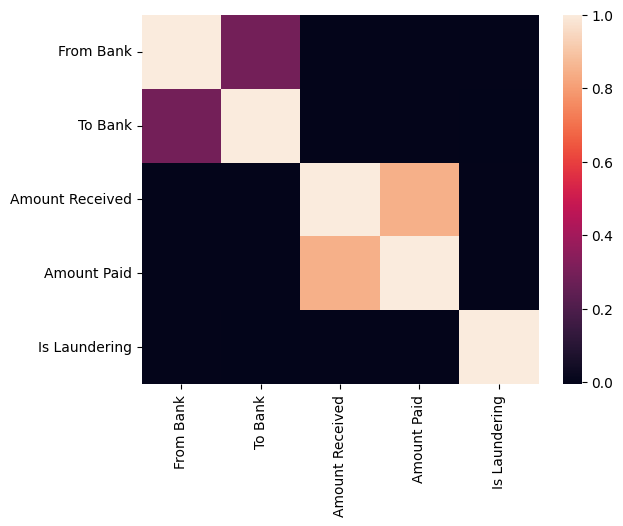

In [ ]:
sns.heatmap(hi_small_trans_df.corr(numeric_only=True))

<Axes: >

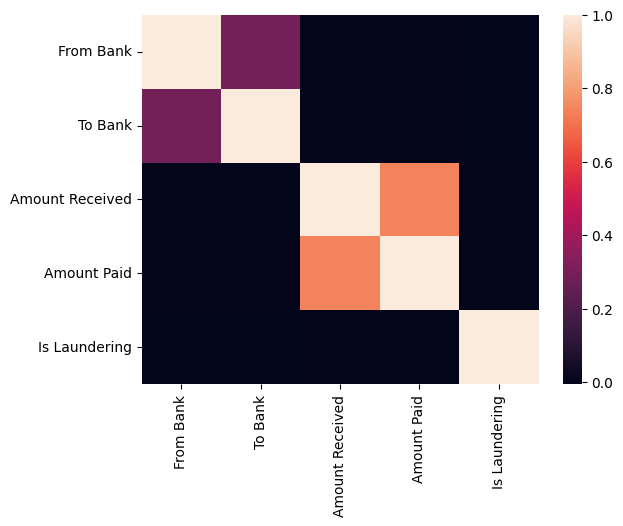

In [30]:
sns.heatmap(li_small_trans_df.corr(numeric_only=True))

We see a strong correlation between Amount Received/Paid and To/From Bank. The other combinations do not have correlation.

The relationship between the Amounts is expected, since each transaction contains two accounts and the Received/Paid should mirror each other. We can see that in the scatterplot below.

I expect that the relationships in the data will reveal themselves not through just checking correlations, but by building a model of how transactions fit together. We need a full picture of how money flows throughout many transactions.

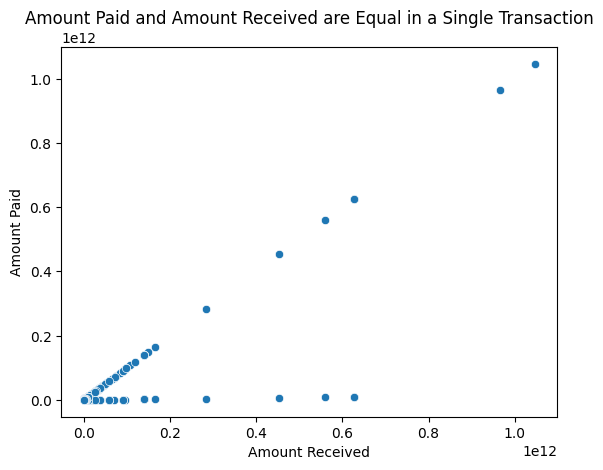

In [36]:
sns.scatterplot(x=hi_small_trans_df['Amount Received'], y=hi_small_trans_df['Amount Paid'])
plt.title("Amount Paid and Amount Received are Equal in a Single Transaction")
None

## Timeline of Transactions for a Sample Account

In [ ]:
# Plotting a timeline of transactions that contains money laundering
hi_small_trans_df[hi_small_trans_df['Is Laundering'] == 1]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
4742,2022/09/01 00:21,70,100428660,1124,800825340,389769.39,US Dollar,389769.39,US Dollar,Cheque,1
40621,2022/09/01 00:03,70,100428660,11474,805B716C0,29024.33,US Dollar,29024.33,US Dollar,Credit Card,1
69152,2022/09/01 00:01,70,100428660,15980,80B39E7B0,792.92,US Dollar,792.92,US Dollar,Credit Card,1
85763,2022/09/01 00:03,70,100428660,113798,80DC756E0,13171425.53,US Dollar,13171425.53,US Dollar,Cheque,1
90684,2022/09/01 00:23,70,100428660,32375,80E480620,14288.83,US Dollar,14288.83,US Dollar,Cash,1
...,...,...,...,...,...,...,...,...,...,...,...
5071168,2022/09/10 23:29,111433,8065C2380,21550,8065C69E0,7773.42,US Dollar,7773.42,US Dollar,ACH,1
5073375,2022/09/10 23:07,9,80727F930,219557,8072A28C0,448920.65,Ruble,448920.65,Ruble,Cheque,1
5074248,2022/09/12 03:34,222,812D127D0,50202,812D129C0,20085.71,Saudi Riyal,20085.71,Saudi Riyal,ACH,1
5075056,2022/09/10 23:43,17327,8095F6C20,15695,8095F6C70,3314.36,US Dollar,3314.36,US Dollar,ACH,1


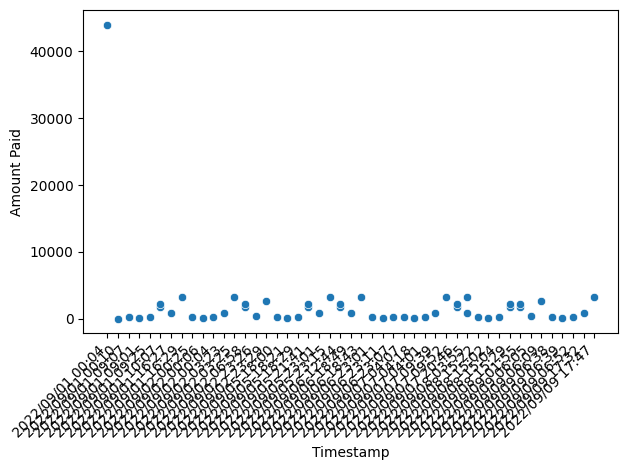

In [54]:
hi_transactions_sample = hi_small_trans_df[hi_small_trans_df['Account'] == '800825340']
sns.scatterplot(hi_transactions_sample, x="Timestamp", y="Amount Paid")
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
None

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.